In [5]:
!rm genim.pyc

rm: cannot remove 'genim.pyc': No such file or directory


In [6]:
!python GenIm.py

In [1]:
import GenIm 
help(GenIm)

Help on module GenIm:

NAME
    GenIm

FILE
    /home/jack/Desktop/imagebot/GenIm.py

FUNCTIONS
    Adtext(inputIm, text)
    
    BlendIms(img0a, img1a, alpha)
    
    Brightness(fileN, output, alpha)
    
    Centercut(img1, new_width, new_height)
    
    CustIm(color)
    
    Draw_text_with_effects(img, (x, y), (xf, yf), text, font, col, halo_col)
    
    Draw_text_with_halo(img, position, text, font, col, halo_col)
    
    GenIm0()
    
    GenIm1()
    
    Generate_the_word(infile)
    
    Get_random_line(file_name)
    
    RanFile(path)
    
    Resize640(image, output)
    
    Rndcolor()
    
    SaveName(savepath, imName)
    
    SaveTemp(Temp)
    
    SaveTempU(TempU)
    
    Signat(imfile, imout)
    
    Swappalette(filename0, filename1, output)
    
    Verify_path(path)
    
    alpha_composite(front, back, falpha)
        Alpha composite two RGBA images.
        Source: http://stackoverflow.com/a/9166671/284318
        Keyword Arguments:
        front -- PIL R

In [4]:
%%writefile GenIm.py
from PIL import Image, ImageChops, ImageDraw, ImageFont, ImageFilter
import random
from random import randint
import time
import markovify
import os
import cv2
import sys
sys.path.insert(1, "/home/jack/anaconda2/envs/py27/lib/python2.7/site-packages")
import twython
from twython import Twython
import shutil
import numpy as np

def Verify_path(path):
    try:
        os.makedirs(path)
    except OSError as exception:
        if exception:
            pass
# creates a tmmpp/ directory for tracking and debug of image generation            
Verify_path('tmmpp/')

def Resize640(image, output):
    Bp=Image.open(image)
    width, height = Bp.size
    if width>height:
        w1=(width-height)/2
        w2 = width-w1
        h1=height-height
        h2=height
        Cc=Bp.crop((w1,h1,w2,h2))
        resizeIm = Cc.resize((640,640), Image.NEAREST)
        resizeIm.save(output)
    else:
        w1= width - width
        w2 = width
        h1 = (height-width)/2
        h2= height - h1
        Cc=Bp.crop((w1,h1,w2,h2))
        #Cc=Bp.crop((260,680,680,940))
        #Cc=Bp.crop((0,260,680,940))
        resizeIm = Cc.resize((640,640), Image.NEAREST)
        resizeIm.save(output)
        return resizeIm
        # USE example
        #image = "junk/wide.png"
        #output = "junk/wideTest4.png"
        #nim = genim.Resize640(image, output)    

def CustIm(color):
    imsize0 = (640,640)
    img0 = Image.new('RGBA', imsize0, color)
    img0.save('tmmpp/img0.png')
    return img0

    # generate and save Custom color/transparency image as: tmmpp/img0.png
    # GenIm.CustIm(color)
        
    
def GenIm0():
    imsize0 = (640,640)
    img0 = Image.new('RGBA', imsize0, (255, 0, 0, 0))
    img0.save('tmmpp/img0.png')
    return img0
# generate and save blank image as: tmmpp/img0.png
GenIm0()

def GenIm1():
    imsize1 = (640,640)
    img1 = Image.new('RGBA', imsize1, (0,255, 0, 0))
    img1.save('tmmpp/img1.png')
    return img1
# generate and save blank image as: tmmpp/img1.png
GenIm1()    


def BlendIms(img0a,img1a,alpha):
    op1 = Image.open(img0a).convert("RGBA")
    op2 = Image.open(img1a).convert("RGBA")
    resulta = ImageChops.blend(op1,op2,alpha)
    resulta.save('tmmpp/resulta.png')
    return resulta

def Brightness(fileN, output, alpha):
    alpha = float(alpha)
    im3 = Image.open(fileN)
    # multiply each pixel by < 1.0 (darker image)
    # multiply each pixel by > 1.0 (lighter image)
    # works best with .jpg and .png files
    # note that lambda is akin to a one-line function
    #im2 = im1.point(lambda p: p * 0.9)
    im4 = im3.point(lambda p: p * alpha)
    im4.save(output)
    return im4
    #Usage Example:
    #fileN = "junk/wideTest4.png"
    #output= "tmmpp/brightnessTest3.png"
    #alpha = 1.2
    #GenIm.brightness(fileN, output, alpha)
    #view = Image.open("tmmpp/brightnessTest3.png")
    #view
def wordcloud(inputF,outputF):
    title = "Python Stuff"
    signature_ = "Jack Northrup" 
    count = 1
    start = Image.open(inputF).convert('RGBA')
    start.save('tmmpp/textbacktmp.jpg')
    while count < 256 :
        base = Image.open('tmmpp/textbacktmp.jpg').convert('RGBA')

        #8 5 4 6 3 2
        # make a blank image for the text, initialized to transparent text color
        txt = Image.new('RGBA', base.size, (255,255,255,0))
        # get a font
        #generate a random size for the font
        int_n = int(count*.2)
        Fsize = randint(15,100-int_n)
        fnt = ImageFont.truetype("/home/jack/.fonts/Exo-Black.ttf", Fsize)
        # get a drawing context
        d = ImageDraw.Draw(txt)
        width, height = base.size
        


        def generate_the_word(infile):
            with open(infile) as f:
                contents_of_file = f.read()
            lines = contents_of_file.splitlines()
            line_number = random.randrange(0, len(lines))
            return lines[line_number]
        textin = (generate_the_word("wordcloud.txt"))

        # calculate the x,y coordinates of the text
        w, h = base.size
        Lw = randint(-150,w-50)
        Lh = randint(-50,h-30)
        #textin = "The TwitterBot Project" 
        #generate random color and opacity
        r = randint(0,256)
        g = randint(0,256)
        b = randint(0,256)
        a = randint(0,count)
        d.text((Lw,Lh), textin, font=fnt, fill=(r,g,b,a))

        out = Image.alpha_composite(base, txt)
        out.save("tmmpp/textbacktmp.jpg", "JPEG")
        count=count+1

    #base = Image.open('images/NewFolder/lightning01.jpg').convert('RGBA')
    #8 5 4 6 3 2
    # make a blank image for the text, initialized to transparent text color
    txt = Image.new('RGBA', out.size, (255,255,255,0))

    # get a font
    fnt = ImageFont.truetype("/home/jack/.fonts/Exo-Black.ttf", 20)
    # get a drawing context
    d = ImageDraw.Draw(txt)

    width, height = out.size
    # calculate the x,y coordinates of the text
    #marginx = 325
    #marginy = 75
    marginx = 225
    marginy = 50
    x = width - marginx
    y = height - marginy

    d.text((x,y), signature_, font=fnt, fill=(0,0,0,256))

    out = Image.alpha_composite(out, txt)
    out.save("tmmpp/tmp.jpg", "JPEG")
    # save the image then reopen to put a title
    base = Image.open('tmmpp/tmp.jpg').convert('RGBA')
    #8 5 4 6 3 2
    # make a blank image for the text, initialized to transparent text color
    txt = Image.new('RGBA', base.size, (255,255,255,0))

    # get a font
    fnt = ImageFont.truetype("/home/jack/.fonts/Exo-Black.ttf", 50)
    # get a drawing context
    d = ImageDraw.Draw(txt)

    width, height = base.size
    # calculate the x,y coordinates of the text
    #marginx = 325
    #marginy = 75
    x = 90
    y = 10
    d.text((x,y), title , font=fnt, fill=(0,0,0,250))
    out2 = Image.alpha_composite(base, txt)
    out2.save(outputF, "JPEG")
    out2.show()
    return out2
    #outputF = 'tmmpp/wordcloud_01.jpg'
    #inputF = 'tmmpp/brightnessTest3.png'
    #wordcloud(inputF,outputF)

n=5
def Swappalette(filename0, filename1, output):
    #input1='/home/jack/Desktop/imagebot/colorful/20170824124329.jpg'
    #input2='/home/jack/Desktop/imagebot/posted/'
    shutil.copy2(filename0, 'instagram/') # complete target filename given
    shutil.copy2(filename1, 'instagram/')# target filename is /dst/dir/file.ext

    aa = Image.open(filename0).convert("RGB")
    #bb = Image.open("/home/jack/Documents/GG.jpg").convert("RGB")
    bb = Image.open(filename1).convert("RGB")
    xx=aa.resize((640,640), Image.NEAREST)
    yy=bb.resize((640,640), Image.NEAREST)
    xx.save("junk/aa.png")
    yy.save("junk/bb.png")
    src = Image.open('junk/aa.png').convert('RGB')
    dst = Image.open('junk/bb.png').convert('RGB')
    src.save("junk/aa.png")
    dst.save("junk/bb.png")
    n = 5 #number of partitions per channel.
    src_handle = Image.open("junk/bb.png")
    dst_handle = Image.open("junk/aa.png")
    src = src_handle.load()
    dst = dst_handle.load()
    assert src_handle.size[0]*src_handle.size[1] == dst_handle.size[0]*dst_handle.size[1],"images must be same size"

    def makePixelList(img):
        l = []
        for x in range(img.size[0]):
            for y in range(img.size[1]):
                l.append((x,y))
        return l

    lsrc = makePixelList(src_handle)
    ldst = makePixelList(dst_handle)

    def sortAndDivide(coordlist,pixelimage,channel): #core
        global src,dst,n
        retlist = []
        #sort
        coordlist.sort(key=lambda t: pixelimage[t][channel])
        #divide
        partitionLength = int(len(coordlist)/n)
        if partitionLength <= 0:
            partitionLength = 1
        if channel < 2:
            for i in range(0,len(coordlist),partitionLength):
                retlist += sortAndDivide(coordlist[i:i+partitionLength],pixelimage,channel+1)
        else:
            retlist += coordlist
        return retlist

    print(src[lsrc[0]])

    lsrc = sortAndDivide(lsrc,src,0)
    ldst = sortAndDivide(ldst,dst,0)

    for i in range(len(ldst)):
        dst[ldst[i]] = src[lsrc[i]]


    filename = time.strftime(output)

    dst_handle.save(filename)

    shutil.copy2(filename, "instagram/")

    custom = "junk/PalletteTemp.png"
    filename0 = (custom)
    return filename0

    """
    import GenIm
    filename0 = 'tmmpp/640_iguana.jpg'   
    filename1 = 'images/Sranger-Tri-001-crop2b.jpg'

    output = "junk/PalletteTemp.png"    
    GenIm.Swappalette(filename0, filename1, output)    
    """    
def RanFile(path):
    base_image = random.choice([
        x for x in os.listdir(path)
        if os.path.isfile(os.path.join(path, x))
        ])
    ranfile=(path+base_image)
    return ranfile

def Draw_text_with_halo(img, position, text, font, col, halo_col):
    halo = Image.new('RGBA', img.size, (0, 0, 0, 0))
    #font = ImageFont.truetype("/home/jack/.fonts/Exo-Black.ttf", 40)
    ImageDraw.Draw(halo).text(position, text, font = font, fill = halo_col)
    blurred_halo = halo.filter(ImageFilter.BLUR)
    ImageDraw.Draw(blurred_halo).text(position, text, font = font, fill = col)
    return Image.composite(img, blurred_halo, ImageChops.invert(blurred_halo))

def Draw_text_with_effects(img, (x,y), (xf,yf), text, font, col, halo_col):
    halo = Image.new('RGBA', img.size, (0, 0, 0, 0))
    font = ImageFont.truetype("/home/jack/.fonts/Exo-Black.ttf", 40)
    ImageDraw.Draw(halo).text((x-xf,y+xf), text, font = font, fill = halo_col)
    blurred_halo = halo.filter(ImageFilter.BLUR)
    ImageDraw.Draw(blurred_halo).text((x,y), text, font = font, fill = col)
    return Image.composite(img, blurred_halo, ImageChops.invert(blurred_halo))
    '''
    Usage:
    import GenIm
    img = Image.open("tmmpp/imblend.png")
    x=200;y=200
    font = ImageFont.truetype("/home/jack/.fonts/Exo-Black.ttf", 40)
    text = "Place Text in Image"
    col= (255,0,0)
    xf=10;yf=10
    halo_col = (255,255,255)
    GenIm.Draw_text_with_effects(img, (x,y), (xf,yf), text, font, col, halo_col)
    '''
def binarize_array(numpy_array, threshold=200):
    """Binarize a numpy array."""
    for i in range(len(numpy_array)):
        for j in range(len(numpy_array[0])):
            if numpy_array[i][j] > threshold:
                numpy_array[i][j] = 255
            else:
                numpy_array[i][j] = 0
    return numpy_array

def applybin(inputA, outputA):
    im = Image.open(inputA)
    im_grey = im.convert('LA') # convert to grayscale
    width,height = im.size

    total=0
    for i in range(0,width):
        for j in range(0,height):
            total += im_grey.getpixel((i,j))[0]

    mean = total / (width * height)
    image_file = Image.open(inputA)
    imagex = image_file.convert('L')  # convert image to monochrome
    imagey = np.array(imagex)
    binim = binarize_array(imagey, mean)
    cv2.imwrite(outputA, binim)
    return binim
    #import GenIm
    #inputA ="tmmpp/640_iguana.jpg"
    #outputA = "tmmpp/binim02.png"
    #binim = GenIm.applybin(inputA, outputA)
    
def bw(imgFile,outFile):
    #convert image to blackand white
    col = Image.open(imgFile)
    gry = col.convert('L')
    grarray = np.asarray(gry)
    bw = (grarray > grarray.mean())*255
    cv2.imwrite(outFile, bw)
    return bw
    #import GenIm
    #imgFile= 'tmmpp/Effects.png'
    #outFile= 'tmmpp/bw3.png'
    #GenIm.bw(imgFile,outFile)

def Generate_the_word(infile):
    with open(infile) as f:
        contents_of_file = f.read()
        lines = contents_of_file.splitlines()
        line_number = random.randrange(0, len(lines))
        return lines[line_number]

def alpha_to_color(image, color=(255, 255, 255)):
    """Set all fully transparent pixels of an RGBA image to the specified color.
    This is a very simple solution that might leave over some ugly edges, due
    to semi-transparent areas. You should use alpha_composite_with color instead.
    Source: http://stackoverflow.com/a/9166671/284318
    Keyword Arguments:
    image -- PIL RGBA Image object
    color -- Tuple r, g, b (default 255, 255, 255)
    """ 
    x = np.array(image)
    r, g, b, a = np.rollaxis(x, axis=-1)
    r[a == 0] = color[0]
    g[a == 0] = color[1]
    b[a == 0] = color[2] 
    x = np.dstack([r, g, b, a])
    return Image.fromarray(x, 'RGBA')


def alpha_composite(front, back, falpha):
    """Alpha composite two RGBA images.
    Source: http://stackoverflow.com/a/9166671/284318
    Keyword Arguments:
    front -- PIL RGBA Image object
    back -- PIL RGBA Image object
    """
    front = np.asarray(front)
    back = np.asarray(back)
    result = np.empty(front.shape, dtype='float')
    alpha = np.index_exp[:, :, 3:]
    rgb = np.index_exp[:, :, :3]
    falpha = front[alpha] / 255.0
    balpha = back[alpha] / 255.0
    result[alpha] = falpha + balpha * (1 - falpha)
    old_setting = np.seterr(invalid='ignore')
    result[rgb] = (front[rgb] * falpha + back[rgb] * balpha * (1 - falpha)) / result[alpha]
    np.seterr(**old_setting)
    result[alpha] *= 255
    np.clip(result, 0, 255)
    # astype('uint8') maps np.nan and np.inf to 0
    result = result.astype('uint8')
    result = Image.fromarray(result, 'RGBA')
    return result


def alpha_composite_with_color(image, color=(255, 255, 255)):
    """Alpha composite an RGBA image with a single color image of the
    specified color and the same size as the original image.
    Keyword Arguments:
    image -- PIL RGBA Image object
    color -- Tuple r, g, b (default 255, 255, 255)
    """
    back = Image.new('RGBA', size=image.size, color=color + (255,))
    return alpha_composite(image, back)


def pure_pil_alpha_to_color_v1(image, color=(255, 255, 255)):
    """Alpha composite an RGBA Image with a specified color.
    NOTE: This version is much slower than the
    alpha_composite_with_color solution. Use it only if
    numpy is not available.
    Source: http://stackoverflow.com/a/9168169/284318
    Keyword Arguments:
    image -- PIL RGBA Image object
    color -- Tuple r, g, b (default 255, 255, 255)
    """ 
    def blend_value(back, front, a):
        return (front * a + back * (255 - a)) / 255

    def blend_rgba(back, front):
        result = [blend_value(back[i], front[i], front[3]) for i in (0, 1, 2)]
        return tuple(result + [255])

    im = image.copy()  # don't edit the reference directly
    p = im.load()  # load pixel array
    for y in range(im.size[1]):
        for x in range(im.size[0]):
            p[x, y] = blend_rgba(color + (255,), p[x, y])

    return im

def pure_pil_alpha_to_color_v2(image, color=(255, 255, 255)):
    """Alpha composite an RGBA Image with a specified color.
    Simpler, faster version than the solutions above.
    Source: http://stackoverflow.com/a/9459208/284318
    Keyword Arguments:
    image -- PIL RGBA Image object
    color -- Tuple r, g, b (default 255, 255, 255)
    """
    image.load()  # needed for split()
    background = Image.new('RGB', image.size, color)
    background.paste(image, mask=image.split()[3])  # 3 is the alpha channel
    return background    
    
def Rndcolor():
    r = randint(50,255)
    g = randint(50,255)
    b = randint(50,255)
    rndcolor = (r,g,b) 
    return rndcolor

def Get_random_line(file_name):
    total_bytes = os.stat(file_name).st_size 
    random_point = random.randint(0, total_bytes)
    file = open(file_name)
    file.seek(random_point)
    file.readline() # skip this line to clear the partial line
    return file.readline()

def Adtext(inputIm,text):
    font = ImageFont.truetype("/home/jack/.fonts/Exo-Black.ttf", 40)
    col = (255, 255,230) # bright green
    halo_col = (0, 0, 0)   # black
    Draw_text_with_halo(img, position, text, font, col, halo_col)
    # USE: img = GenIm.Adtext(inputIm,text)
    return text
    
def Signat(imfile,imout):
    fnt = ImageFont.truetype("/home/jack/.fonts/Exo-Black.ttf", 25)
    width, height = imfile.size
    marginx = 325
    marginy = 35
    x = width - marginx
    y = height - marginy
    signature_ = "The TwitterBot Project" 
    text_col2 = (255, 255,230) # bright green
    halo_col2 = (0, 0, 0)   # black
    imfile = Draw_text_with_halo(imfile,(x,y), signature_ , fnt, text_col2, halo_col2) 
    imfile.save(imout)
    return imfile

def Centercut(img1, new_width, new_height):
    # def Centercut(path, img1, new_width, new_height):
    # img = Image.open(path+"/"+img1)
    img = Image.open(img1)
    w_var=new_width/2
    h_var=new_height/2
    half_the_width = img.size[0] / 2
    half_the_height = img.size[1] / 2
    img4 = img.crop(
        (
            half_the_width - w_var,
            half_the_height - h_var,
            half_the_width + w_var,
            half_the_height + h_var
        )
    )
    return img4

def SaveTempU(TempU):
    tempU = time.strftime("tmmpp/SaveTempU_%Y%m%d%H%M%S.png")
    TempU.save(tempu)
    return filepath

def SaveTemp(Temp):
    Tempname = time.strftime("tmmpp/SaveTemp.png")
    Temp.save(Tempname)
    return Tempname

def SaveName(savepath,imName):
    filename = time.strftime("SaveName_%Y%m%d%H%M%S.png")
    filepath = os.path.join(savepath,filename)
    imName.save(filepath)
    return filepath



Overwriting GenIm.py


# CustIm(color)

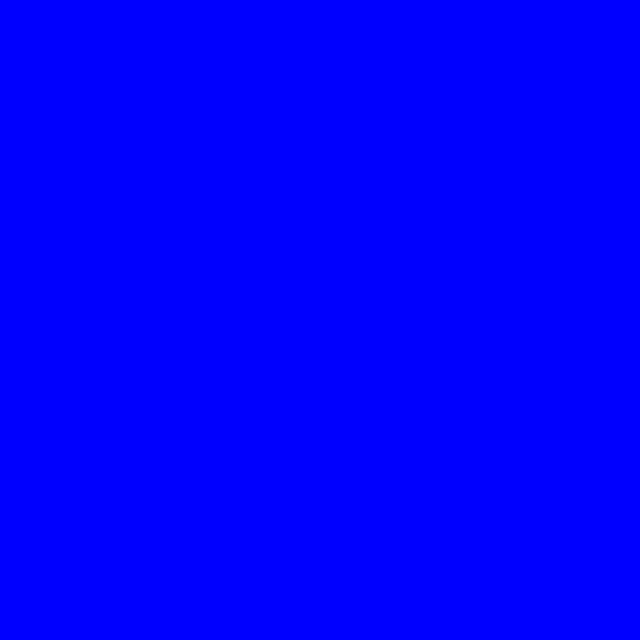

In [5]:
from PIL import Image
import genim
color = (0,0,255,255)
im = genim.CustIm(color)
im

# Brightness(fileN, output, alpha)

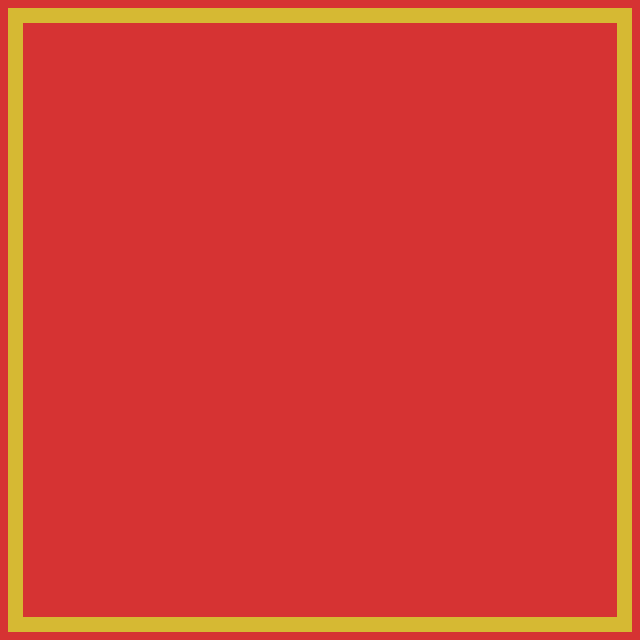

In [8]:
from PIL import Image
import GenIm
fileN = "junk/wideTest4.png"
output= "tmmpp/brightnessTest3.png"
alpha = .8
genim.Brightness(fileN, output, alpha)
view = Image.open("tmmpp/brightnessTest3.png")
view

# Draw_text_with_halo(img, position, text, font, col, halo_col)

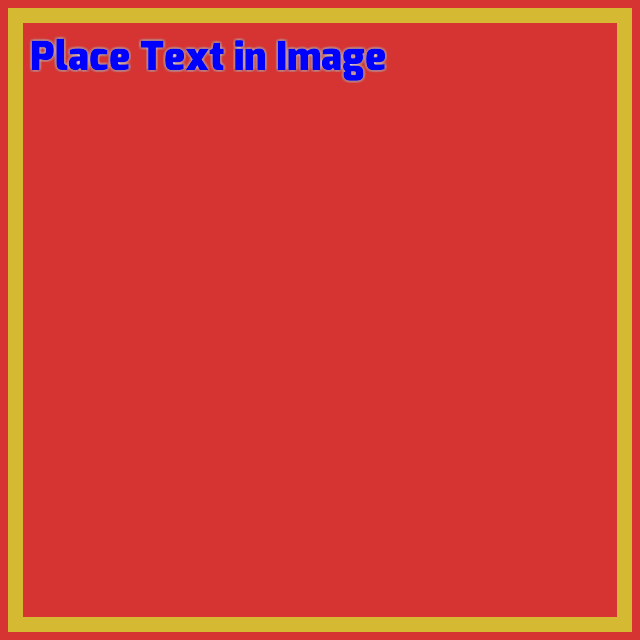

In [10]:
import genim
from PIL import Image,ImageFont
img = Image.open("tmmpp/brightnessTest3.png")
position = (30,30)
font = ImageFont.truetype("/home/jack/.fonts/Exo-Black.ttf", 40)
text = "Place Text in Image"
col= (0,0,255)
halo_col = (255,255,255)
genim.Draw_text_with_halo(img, position, text, font, col, halo_col)

# ----------------------------------
# Resize640(image, output)
### this crops an image to its 640x640 square with largest center possible,
### whether in landscape or portrait mode

In [11]:
# lets get an image
!wget -O tmmpp/iguana.jpg https://upload.wikimedia.org/wikipedia/commons/7/78/Galapagos_iguana1.jpg

--2017-09-08 14:36:10--  https://upload.wikimedia.org/wikipedia/commons/7/78/Galapagos_iguana1.jpg
Resolving upload.wikimedia.org (upload.wikimedia.org)... 198.35.26.112, 2620:0:863:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|198.35.26.112|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 121479 (119K) [image/jpeg]
Saving to: ‘tmmpp/iguana.jpg’

tmmpp/iguana.jpg    100%[===================>] 118.63K   192KB/s    in 0.6s    

2017-09-08 14:36:11 (192 KB/s) - ‘tmmpp/iguana.jpg’ saved [121479/121479]



In [16]:
# get the original image size

from PIL import Image
im = Image.open("tmmpp/iguana.jpg")
im.size

(1024, 768)

In [14]:
from PIL import Image
import genim

image = "tmmpp/iguana.jpg"
output = "tmmpp/640_iguana.jpg"
genim.Resize640(image, output)
im = Image.open("tmmpp/640_iguana.jpg")
im.size

(640, 640)

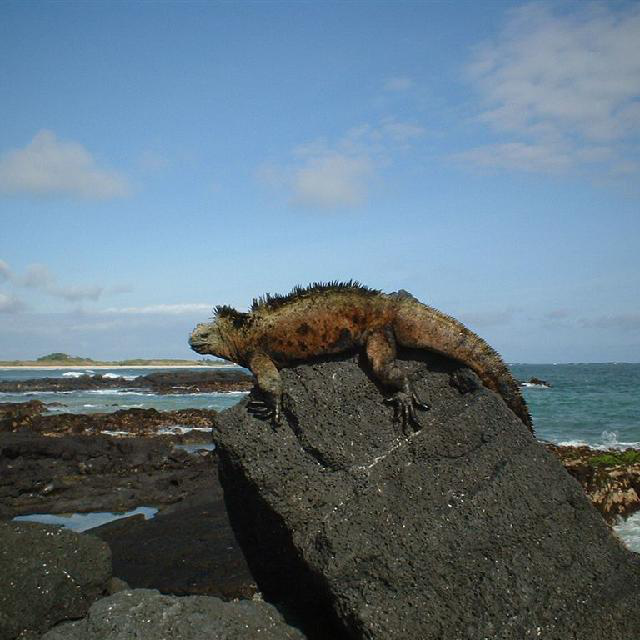

In [15]:
from PIL import Image
im = Image.open("tmmpp/640_iguana.jpg")
im

# Signat(imfile, imout)

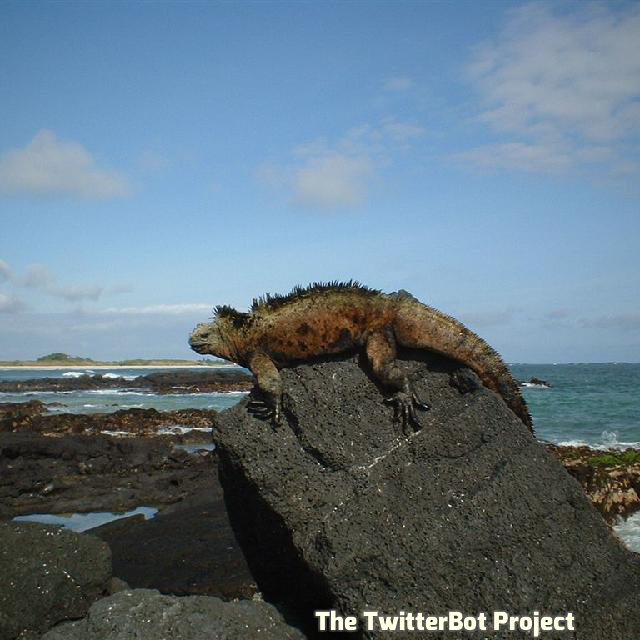

In [1]:
from PIL import Image
import genim
imfile = Image.open('tmmpp/640_iguana.jpg')  
imout = "tmmpp/640_iguanaS.png"
genim.Signat(imfile, imout)

In [11]:
import GenIm
help(GenIm.Signat)

Help on function Signat in module GenIm:

Signat(imfile, imout)



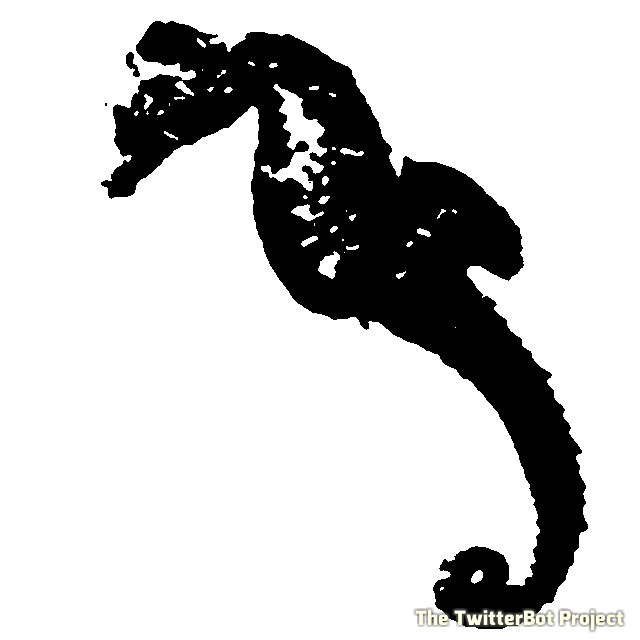

In [158]:
def draw_text_with_halo(img, position, text, font, col, halo_col):
    halo = Image.new('RGBA', img.size, (0, 0, 0, 0))
    ImageDraw.Draw(halo).text(position, text, font = font, fill = halo_col)
    blurred_halo = halo.filter(ImageFilter.BLUR)
    ImageDraw.Draw(blurred_halo).text(position, text, font = font, fill = col)
    return Image.composite(img, blurred_halo, ImageChops.invert(blurred_halo))
    
def signat(imfile, imout):
    # get a font
    fnt = ImageFont.truetype("/home/jack/.fonts/Exo-Black.ttf", 20)
    # get a drawing context
    width, height = imfile.size
    marginx = 225
    marginy = 35
    x = width - marginx
    y = height - marginy
    signature_ = "The TwitterBot Project" 
    #text_col2 = (150, 255, 150) # bright green
    #halo_col2 = (0, 0, 0)   # black
    text_col2 = (255, 255,230) # bright green
    halo_col2 = (0, 0, 0)   # black
    #text_col2 = (0, 0, 0)  # bright green
    #halo_col2 = (255, 255,230)  # black    
    imfile = draw_text_with_halo(imfile,(x,y), signature_, fnt, text_col2, halo_col2) 
    imfile.save(imout)
    return imfile
img0a = 'junk/th2_20170824111454.jpg'  
imout = "junkim.png"
signat(imfile, imout)

In [6]:
!rm genim.pyc

In [12]:
import GenIm
help(GenIm.BlendIms)

Help on function BlendIms in module GenIm:

BlendIms(img0a, img1a, alpha)



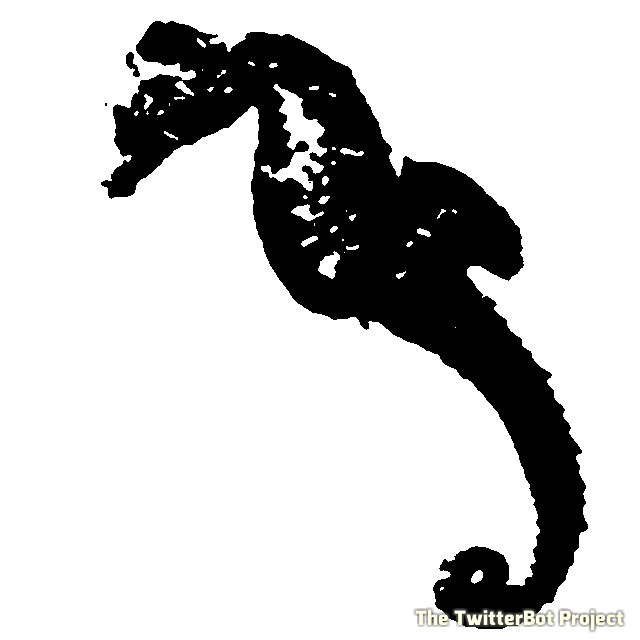

In [9]:
import genim
from genim import *
Temp = Image.open('junk/th2_20170824111454.jpg')
imfile = Temp
imout = "mojunk.jpg"
genim.Signat(imfile, imout)

Temp = Signat(imfile, imout)
SaveTemp(Temp)
im = SaveTemp(Temp)
img = Image.open(im)
img

In [ ]:
import genim
from genim import *
Temp = Image.open('junk/th2_20170824111454.jpg')
SaveTemp(Temp)
im = SaveTemp(Temp)
print im
Temp = Image.open('tmmpp/SaveTemp.png')
Temp

In [10]:
import genim
from genim import *
img0a = 'junk/th2_20170824111454.jpg'  
img1a = 'junk/th2_20170824111919.jpg'
alpha = .4
imblend = BlendIms(img0a,img1a,alpha)
imblend.save("tmmpp/imblend.png")

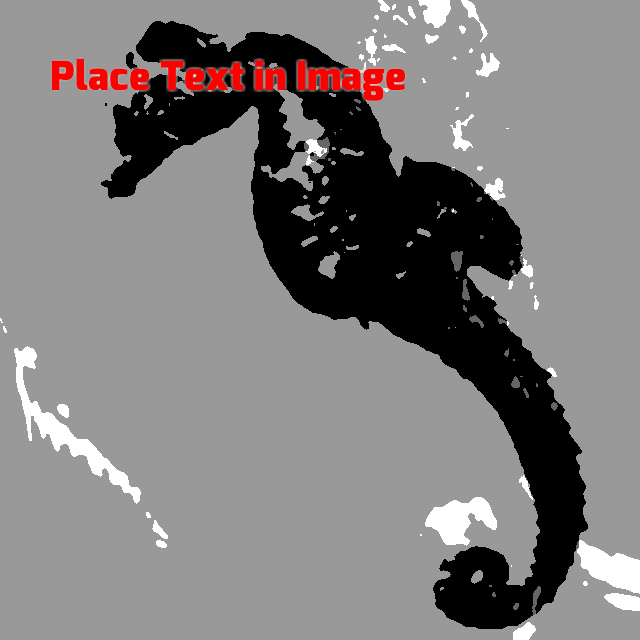

In [18]:
from PIL import Image, ImageChops, ImageDraw, ImageFont, ImageFilter
from GenIm import Draw_text_with_halo
def Draw_text_with_effects(img, (x,y), offset, text, font, col, halo_col):
    halo = Image.new('RGBA', img.size, (0, 0, 0, 0))
    font = ImageFont.truetype("/home/jack/.fonts/Exo-Black.ttf", 40)
    xf,yf = offset
    ImageDraw.Draw(halo).text((x-xf,y+xf), text, font = font, fill = halo_col)
    blurred_halo = halo.filter(ImageFilter.BLUR)
    ImageDraw.Draw(blurred_halo).text((x,y), text, font = font, fill = col)
    return Image.composite(img, blurred_halo, ImageChops.invert(blurred_halo))

img = Image.open("tmmpp/imblend.png")
x=50;y=50
font = ImageFont.truetype("/home/jack/.fonts/Exo-Black.ttf", 40)
text = "Place Text in Image"
col= (255,0,0)
offset = (16,16)
halo_col = (255,255,255)
Draw_text_with_effects(img, position, offset, text, font, col, halo_col)
Draw_text_with_halo(img, (x,y), text, font, col, halo_col)

In [102]:
import genim
help(genim)

Help on module genim:

NAME
    genim

FILE
    /home/jack/Desktop/imagebot/genim.py

CLASSES
    GenIm
    
    class GenIm
     |  Methods defined here:
     |  
     |  BlendIms(img0a, img1a, alpha)
     |  
     |  GenIm0()
     |  
     |  GenIm1()
     |  
     |  RanFile(path)
     |  
     |  SaveName(savepath, imName)
     |  
     |  SaveTemp(Temp)
     |  
     |  SaveTempU(TempU)
     |  
     |  __init__(self, GenIm)
     |  
     |  verify_path(path)




In [93]:
%%writefile genim.py
from PIL import Image, ImageChops, ImageDraw, ImageFont, ImageFilter
import random
from random import randint
import time
import markovify
import os
import sys
sys.path.insert(1, "/home/jack/anaconda2/envs/py27/lib/python2.7/site-packages")
import twython
from twython import Twython

def verify_path(path):
    try:
        os.makedirs(path)
    except OSError as exception:
        if exception:
            pass
# creates a tmmpp/ directory for tracking and debug of image generation            
verify_path('tmmpp/')

def GenIm0():
    imsize0 = (640,640)
    img0 = Image.new('RGBA', imsize0, (255, 0, 0, 0))
    img0.save('tmmpp/img0.png')
    return img0
# generate and save blank image tmmpp/img0.png
GenIm0()

def GenIm1():
    imsize1 = (640,640)
    img1 = Image.new('RGBA', imsize1, (0,255, 0, 0))
    img1.save('tmmpp/img1.png')
    return img1
# generate and save blank image tmmpp/img0.png
GenIm1()    


def BlendIms(img0a,img1a,alpha):
    resulta = ImageChops.blend(img0a,img1a,alpha)
    resulta.save('tmmpp/resulta.png')
    return resulta

    
def RanFile(path):
    base_image = random.choice([
        x for x in os.listdir(path)
        if os.path.isfile(os.path.join(path, x))
        ])
    ranfile=(path+base_image)
    return ranfile

def SaveTempU(TempU):
    tempU = time.strftime("tmmpp/SaveTempU_%Y%m%d%H%M%S.png")
    TempU.save(tempu)
    return filepath

def SaveTemp(Temp):
    Tempname = time.strftime("tmmpp/SaveTemp.png")
    Temp.save(Tempname)
    return Tempname

def SaveName(savepath,imName):
    filename = time.strftime("SaveName_%Y%m%d%H%M%S.png")
    filepath = os.path.join(savepath,filename)
    imName.save(filepath)
    return filepath



Overwriting genim.py


In [5]:
from PIL import Image, ImageChops, ImageDraw, ImageFont, ImageFilter
import random
from random import randint
import time
import markovify
import os
import sys
sys.path.insert(1, "/home/jack/anaconda2/envs/py27/lib/python2.7/site-packages")
import twython
from twython import Twython



def GenIm0():
    imsize0 = (640,640)
    img0 = Image.new('RGBA', imsize, (0, 0, 0, 0))

def GenIm1():
    imsize1 = (640,640)
    img1 = Image.new('RGBA', imsize, (0, 0, 0, 0))


def blendIms(img0,img1,alpha):
    halo = Image.new('RGBA', img.size, (0, 0, 0, 0))

    
def RanFile(path):
    base_image = random.choice([
        x for x in os.listdir(path)
        if os.path.isfile(os.path.join(path, x))
        ])
    ranfile=(path+base_image)
    return ranfile
    # gets a random file from a directory. The directory needs to contain only the filetypes required
    # Use:
    # path = r"/home/user/images/"
    # ranfile = RanFile(path)
    # print ranfile


/home/jack/Desktop/deep-dream-generator/notebooks/context-free/output/20170828160750.png


In [ ]:
%%writefile saltpost.py
#ONE TIME MANUAL POSTS
#!/home/jack/anaconda2/python
import random
from random import randint
import time
import markovify
import os
import sys
sys.path.insert(1, "/home/jack/anaconda2/envs/py27/lib/python2.7/site-packages")
import twython
from twython import Twython
from PIL import Image, ImageChops, ImageDraw, ImageFont, ImageFilter

def generate_the_word(infile):
        with open(infile) as f:
            contents_of_file = f.read()
        lines = contents_of_file.splitlines()
        line_number = random.randrange(0, len(lines))
        return lines[line_number]

def draw_text_with_halo(img, position, text, font, col, halo_col):
    halo = Image.new('RGBA', img.size, (0, 0, 0, 0))
    ImageDraw.Draw(halo).text(position, text, font = font, fill = halo_col)
    blurred_halo = halo.filter(ImageFilter.BLUR)
    ImageDraw.Draw(blurred_halo).text(position, text, font = font, fill = col)
    return Image.composite(img, blurred_halo, ImageChops.invert(blurred_halo))

def rndcolor():
    r = randint(50,255)
    g = randint(50,255)
    b = randint(50,255)
    rndcolor = (r,g,b) 
    return rndcolor

def get_random_line(file_name):
    total_bytes = os.stat(file_name).st_size 
    random_point = random.randint(0, total_bytes)
    file = open(file_name)
    file.seek(random_point)
    file.readline() # skip this line to clear the partial line
    return file.readline()



if __name__ == '__main__':
    nap = randint(500,1200)
    time.sleep(nap)
    isize = (640,640)     
    inp = Image.new('RGB', isize)
    font = ImageFont.truetype("/home/jack/.fonts/Exo-Black.ttf", 40)
    text_col = (255, 255,230) # bright green
    halo_col = (0, 0, 0)   # black
    textin = (generate_the_word("wordcloud.txt"))
    i2 = draw_text_with_halo(inp, (15, 8), "SaltMan", font, text_col, halo_col)
    
    #txt = Image.new('RGBA', i.size, (255,255,255,0))

    # get a font
    fnt = ImageFont.truetype("/home/jack/.fonts/Exo-Black.ttf", 20)
    # get a drawing context
    width, height = inp.size
    marginx = 225
    marginy = 35
    x = width - marginx
    y = height - marginy
    signature_ = "The TwitterBot Project" 
    #text_col2 = (150, 255, 150) # bright green
    #halo_col2 = (0, 0, 0)   # black
    text_col2 = (255, 255,230) # bright green
    halo_col2 = (0, 0, 0)   # black
    #text_col2 = (0, 0, 0)  # bright green
    #halo_col2 = (255, 255,230)  # black    
    txt1=draw_text_with_halo(i2,(x,y), signature_, fnt, text_col2, halo_col2)
    
    
    
    # get a font
    fs=randint(15,24)
    fnt = ImageFont.truetype("/home/jack/.fonts/Exo-Black.ttf", fs)
    # get a drawing context
    width, height = inp.size
    marginx = 225
    marginy = 35
    x = width - marginx
    y = height - marginy
    signature_ = "The TwitterBot Project" 
    #text_col2 = (150, 255, 150) # bright green
    #halo_col2 = (0, 0, 0)   # black
    #text_col2 = (255, 255,230) # bright green
    text_col2 = rndcolor()
    halo_col2 = (0, 0, 0)   # black
    #text_col2 = (0, 0, 0)  # bright green
    #halo_col2 = (255, 255,230)  # black 
    yy=randint(70,290)
    xx=randint(5,60)
    #iword = (text_model.make_short_sentence(50))
    file_name = 'saltman.txt'
    iword = get_random_line(file_name)
    
    txt3=draw_text_with_halo(txt1,(xx,yy), iword, fnt, text_col2, halo_col2)
   
    vv=randint(320,530)
    vvv=randint(5,10)
    #iword = (text_model.make_short_sentence(50))
    file_name = 'saltman.txt'
    lword = get_random_line(file_name)        
    text_col3 = rndcolor()
    fs2=randint(15,24)
    fnt = ImageFont.truetype("/home/jack/.fonts/Exo-Black.ttf", fs2)
    txt=draw_text_with_halo(txt3,(vvv,vv), lword, fnt, text_col3, halo_col2)
     
    out = Image.alpha_composite(i2, txt)
    out.save("tmp/TM_POST.jpg")

#removed keys for privacy reasons
CONSUMER_KEY = 'YazCRIfWX4VICiRCOiph08jDL'
CONSUMER_SECRET = 'QOkLHou6NMwkghSHjMFXMdffQKJlDzttKtP6uBCcZ4VlQtvJyc'
ACCESS_KEY = '296906916-AWggjhqpEWIS7EzXXhc2pOPBeCVJczpOm11cQGIf'
ACCESS_SECRET = 'zFrCiyaPt8gCBVVs1bLCmdCSyQQ3DKxT5wHJq2tOu2AMj'

twitter = Twython(CONSUMER_KEY, CONSUMER_SECRET, ACCESS_KEY, ACCESS_SECRET)
#path = 'images/NewFolder'
#f = open("Mine.txt")
#text = f.read()
# Build the model.
#text_model = markovify.Text(text)
# Print randomly-generated sentences of no more than 140 characters
#http://paulbourke.net/fractals/
#STR = (text_model.make_short_sentence(140))
#random.choice(open('Mine.txt').readlines())



file_name = 'Mine.txt'
STR = get_random_line(file_name)

#STR = ("Sometimes we have visitors at night. If lucky we don't wake up.")
#PATH = "/home/jack/Desktop/deep-dream-generator/notebooks/STUFF/experiment/experiment8.jpg"
PATH = "tmp/TM_POST.jpg"
# 1 , 2, 3, 12, 5, 15, 8, 6
#photo = open('/home/jack/Desktop/deep-dream-generator/notebooks/images/'+file_list[rnd]+'.jpg','rb')

photo = open(PATH,'rb')
response = twitter.upload_media(media=photo)
twitter.update_status(status=STR, media_ids=[response['media_id']])
#print STR


In [74]:
from fractions import Fraction
class Thefraction:

    def __init__(self,a,b):
        self.a = a
        self.b =b
    def add(self):
        return self.a+ self.b
    def subtract(self):
        return self.a-self.b
    def divide(self):
        return self.a/self.b
    def multiply(self):
        return self.a/self.b

if __name__=='__main__':
    try:
        a = Fraction(input('Please type first fraction '))
        b = Fraction(input('Please type second fraction '))
        choice = int(input('Please select one of these 1. add 2. subtract 3. divide 4. multiply '))
        if choice ==1:
            print(Thefraction(a,b).add())
        elif choice==2:
            print(Thefraction(a,b).subtract())
        elif choice==3:
            print(Thefraction(a,b).divide())
        elif choice==4:
            print(Thefraction(a,b).multiply())
    except ValueError:
        print('Value error!!!!!')

Please type first fraction 3/4
Please type second fraction 1/2
Please select one of these 1. add 2. subtract 3. divide 4. multiply 3


ZeroDivisionError: Fraction(0, 0)

In [21]:
%%writefile genim.py
from PIL import Image, ImageChops, ImageDraw, ImageFont, ImageFilter
import random
from random import randint
import time
import markovify
import os
import sys
sys.path.insert(1, "/home/jack/anaconda2/envs/py27/lib/python2.7/site-packages")
import twython
from twython import Twython

def Verify_path(path):
    try:
        os.makedirs(path)
    except OSError as exception:
        if exception:
            pass
# creates a tmmpp/ directory for tracking and debug of image generation            
Verify_path('tmmpp/')

def Resize640(image, output):
    Bp=Image.open(image)
    width, height = Bp.size
    if width>height:
        w1=(width-height)/2
        w2 = width-w1
        h1=height-height
        h2=height
        Cc=Bp.crop((w1,h1,w2,h2))
        resizeIm = Cc.resize((640,640), Image.NEAREST)
        resizeIm.save(output)
    else:
        w1= width - width
        w2 = width
        h1 = (height-width)/2
        h2= height - h1
        Cc=Bp.crop((w1,h1,w2,h2))
        #Cc=Bp.crop((260,680,680,940))
        #Cc=Bp.crop((0,260,680,940))
        resizeIm = Cc.resize((640,640), Image.NEAREST)
        resizeIm.save(output)
        return resizeIm
        # USE example
        #image = "junk/wide.png"
        #output = "junk/wideTest4.png"
        #nim = genim.Resize640(image, output)    

def CustIm(color):
    imsize0 = (640,640)
    img0 = Image.new('RGBA', imsize0, color)
    img0.save('tmmpp/img0.png')
    return img0

    # generate and save Custom color/transparency image as: tmmpp/img0.png
    #CustIm(color)
        
    
def GenIm0():
    imsize0 = (640,640)
    img0 = Image.new('RGBA', imsize0, (255, 0, 0, 0))
    img0.save('tmmpp/img0.png')
    return img0
# generate and save blank image as: tmmpp/img0.png
GenIm0()

def GenIm1():
    imsize1 = (640,640)
    img1 = Image.new('RGBA', imsize1, (0,255, 0, 0))
    img1.save('tmmpp/img1.png')
    return img1
# generate and save blank image as: tmmpp/img1.png
GenIm1()    


def BlendIms(img0a,img1a,alpha):
    op1 = Image.open(img0a).convert("RGBA")
    op2 = Image.open(img1a).convert("RGBA")
    resulta = ImageChops.blend(op1,op2,alpha)
    resulta.save('tmmpp/resulta.png')
    return resulta

def Brightness(fileN, output, alpha):
    alpha = float(alpha)
    im3 = Image.open(fileN)
    # multiply each pixel by < 1.0 (darker image)
    # multiply each pixel by > 1.0 (lighter image)
    # works best with .jpg and .png files
    # note that lambda is akin to a one-line function
    #im2 = im1.point(lambda p: p * 0.9)
    im4 = im3.point(lambda p: p * alpha)
    im4.save(output)
    return im4
    #Usage Example:
    #fileN = "junk/wideTest4.png"
    #output= "tmmpp/brightnessTest3.png"
    #alpha = 1.2
    #genim.brightness(fileN, output, alpha)
    #view = Image.open("tmmpp/brightnessTest3.png")
    #view
def wordcloud(inputF,outputF):
    title = "Python Stuff"
    signature_ = "Jack Northrup" 
    count = 1
    start = Image.open(inputF).convert('RGBA')
    start.save('tmmpp/textbacktmp.jpg')
    while count < 256 :
        base = Image.open('tmmpp/textbacktmp.jpg').convert('RGBA')

        #8 5 4 6 3 2
        # make a blank image for the text, initialized to transparent text color
        txt = Image.new('RGBA', base.size, (255,255,255,0))
        # get a font
        #generate a random size for the font
        int_n = int(count*.2)
        Fsize = randint(15,100-int_n)
        fnt = ImageFont.truetype("/home/jack/.fonts/Exo-Black.ttf", Fsize)
        # get a drawing context
        d = ImageDraw.Draw(txt)

        width, height = base.size


        def generate_the_word(infile):
            with open(infile) as f:
                contents_of_file = f.read()
            lines = contents_of_file.splitlines()
            line_number = random.randrange(0, len(lines))
            return lines[line_number]
        textin = (generate_the_word("wordcloud.txt"))

        # calculate the x,y coordinates of the text
        w, h = base.size
        Lw = randint(-150,w-50)
        Lh = randint(-50,h-30)
        #textin = "The TwitterBot Project" 
        #generate random color and opacity
        r = randint(0,256)
        g = randint(0,256)
        b = randint(0,256)
        a = randint(0,count)
        d.text((Lw,Lh), textin, font=fnt, fill=(r,g,b,a))

        out = Image.alpha_composite(base, txt)
        out.save("tmmpp/textbacktmp.jpg", "JPEG")
        count=count+1

    #base = Image.open('images/NewFolder/lightning01.jpg').convert('RGBA')
    #8 5 4 6 3 2
    # make a blank image for the text, initialized to transparent text color
    txt = Image.new('RGBA', out.size, (255,255,255,0))

    # get a font
    fnt = ImageFont.truetype("/home/jack/.fonts/Exo-Black.ttf", 20)
    # get a drawing context
    d = ImageDraw.Draw(txt)

    width, height = out.size
    # calculate the x,y coordinates of the text
    #marginx = 325
    #marginy = 75
    marginx = 225
    marginy = 50
    x = width - marginx
    y = height - marginy

    d.text((x,y), signature_, font=fnt, fill=(0,0,0,256))

    out = Image.alpha_composite(out, txt)
    out.save("tmmpp/tmp.jpg", "JPEG")
    # save the image then reopen to put a title
    base = Image.open('tmmpp/tmp.jpg').convert('RGBA')
    #8 5 4 6 3 2
    # make a blank image for the text, initialized to transparent text color
    txt = Image.new('RGBA', base.size, (255,255,255,0))

    # get a font
    fnt = ImageFont.truetype("/home/jack/.fonts/Exo-Black.ttf", 50)
    # get a drawing context
    d = ImageDraw.Draw(txt)

    width, height = base.size
    # calculate the x,y coordinates of the text
    #marginx = 325
    #marginy = 75
    x = 90
    y = 10

    d.text((x,y), title , font=fnt, fill=(0,0,0,250))

    out2 = Image.alpha_composite(base, txt)
    out2.save(outputF, "JPEG")
    out2.show()
    
    #outputF = 'tmmpp/wordcloud_01.jpg'
    #inputF = 'tmmpp/brightnessTest3.png'
    #wordcloud(inputF,outputF)

def RanFile(path):
    base_image = random.choice([
        x for x in os.listdir(path)
        if os.path.isfile(os.path.join(path, x))
        ])
    ranfile=(path+base_image)
    return ranfile

def Draw_text_with_halo(img, position, text, font, col, halo_col):
    halo = Image.new('RGBA', img.size, (0, 0, 0, 0))
    font = ImageFont.truetype("/home/jack/.fonts/Exo-Black.ttf", 40)
    ImageDraw.Draw(halo).text(position, text, font = font, fill = halo_col)
    blurred_halo = halo.filter(ImageFilter.BLUR)
    ImageDraw.Draw(blurred_halo).text(position, text, font = font, fill = col)
    return Image.composite(img, blurred_halo, ImageChops.invert(blurred_halo))

def Draw_text_with_effects(img, (x,y), (xf,yf), text, font, col, halo_col):
    halo = Image.new('RGBA', img.size, (0, 0, 0, 0))
    font = ImageFont.truetype("/home/jack/.fonts/Exo-Black.ttf", 40)
    ImageDraw.Draw(halo).text((x-xf,y+xf), text, font = font, fill = halo_col)
    blurred_halo = halo.filter(ImageFilter.BLUR)
    ImageDraw.Draw(blurred_halo).text((x,y), text, font = font, fill = col)
    return Image.composite(img, blurred_halo, ImageChops.invert(blurred_halo))
    '''
    Usage:
    img = Image.open("tmmpp/imblend.png")
    x=200;y=200
    font = ImageFont.truetype("/home/jack/.fonts/Exo-Black.ttf", 40)
    text = "Place Text in Image"
    col= (255,0,0)
    xf=10;yf=10
    halo_col = (255,255,255)
    Draw_text_with_effects(img, (x,y), (xf,yf), text, font, col, halo_col)
    '''
def binarize_array(numpy_array, threshold=200):
    """Binarize a numpy array."""
    for i in range(len(numpy_array)):
        for j in range(len(numpy_array[0])):
            if numpy_array[i][j] > threshold:
                numpy_array[i][j] = 255
            else:
                numpy_array[i][j] = 0
    return numpy_array

def applybin(inputA, outputA):
    im = Image.open(inputA)
    im_grey = im.convert('LA') # convert to grayscale
    width,height = im.size

    total=0
    for i in range(0,width):
        for j in range(0,height):
            total += im_grey.getpixel((i,j))[0]

    mean = total / (width * height)
    image_file = Image.open(inputA)
    imagex = image_file.convert('L')  # convert image to monochrome
    imagey = np.array(imagex)
    binim = binarize_array(imagey, mean)
    cv2.imwrite(outputA, binim)
    return binim
    #inputA ="tmmpp/640_iguana.jpg"
    #outputA = "tmmpp/binim02.png"
    #binim = applybin(inputA, outputA)
    
def bw(imgFile,outFile):
    #convert image to blackand white
    col = Image.open(imgFile)
    gry = col.convert('L')
    grarray = np.asarray(gry)
    bw = (grarray > grarray.mean())*255
    cv2.imwrite(outFile, bw)
    return bw
    #imgFile= 'tmmpp/Effects.png'
    #outFile= 'tmmpp/bw3.png'
    #genim.bw(imgFile,outFile)

def Generate_the_word(infile):
    with open(infile) as f:
        contents_of_file = f.read()
        lines = contents_of_file.splitlines()
        line_number = random.randrange(0, len(lines))
        return lines[line_number]
    
def Rndcolor():
    r = randint(50,255)
    g = randint(50,255)
    b = randint(50,255)
    rndcolor = (r,g,b) 
    return rndcolor

def Get_random_line(file_name):
    total_bytes = os.stat(file_name).st_size 
    random_point = random.randint(0, total_bytes)
    file = open(file_name)
    file.seek(random_point)
    file.readline() # skip this line to clear the partial line
    return file.readline()

def Adtext(inputIm,text):
    font = ImageFont.truetype("/home/jack/.fonts/Exo-Black.ttf", 40)
    col = (255, 255,230) # bright green
    halo_col = (0, 0, 0)   # black
    Draw_text_with_halo(img, position, text, font, col, halo_col)
    # USE: img = draw_text_with_halo(inputIm, (15, 8), text, font, text_color, halo_color)
    return text
    
def Signat(imfile,imout):
    fnt = ImageFont.truetype("/home/jack/.fonts/Exo-Black.ttf", 25)
    width, height = imfile.size
    marginx = 325
    marginy = 35
    x = width - marginx
    y = height - marginy
    signature_ = "The TwitterBot Project" 
    text_col2 = (255, 255,230) # bright green
    halo_col2 = (0, 0, 0)   # black
    imfile = Draw_text_with_halo(imfile,(x,y), signature_ , fnt, text_col2, halo_col2) 
    imfile.save(imout)
    return imfile

def Centercut(path, img1, new_width, new_height):
    img = Image.open(path+"/"+img1)
    w_var=new_width/2
    h_var=new_height/2
    half_the_width = img.size[0] / 2
    half_the_height = img.size[1] / 2
    img4 = img.crop(
        (
            half_the_width - w_var,
            half_the_height - h_var,
            half_the_width + w_var,
            half_the_height + h_var
        )
    )
    return img4

def SaveTempU(TempU):
    tempU = time.strftime("tmmpp/SaveTempU_%Y%m%d%H%M%S.png")
    TempU.save(tempu)
    return filepath

def SaveTemp(Temp):
    Tempname = time.strftime("tmmpp/SaveTemp.png")
    Temp.save(Tempname)
    return Tempname

def SaveName(savepath,imName):
    filename = time.strftime("SaveName_%Y%m%d%H%M%S.png")
    filepath = os.path.join(savepath,filename)
    imName.save(filepath)
    return filepath



Overwriting genim.py
